# **1. 준비된 Custom Dataset 가져오기**

**1-1. 데이터 가져오기**
- VM에 dataset.zip 파일로 업로드 후 압축 풀기

In [1]:
import zipfile

with zipfile.ZipFile('/content/nut_data.zip') as target_file:
    target_file.extractall('/content/nut_data')

In [2]:
!pip install labelme2yolo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.5 MB/s eta 0:00:00


In [3]:
!labelme2yolo --json_dir /content/nut_data --val_size 0.2 --output_format polygon  # --output_format bbox 또는 polygon(default는 bbox)

[2024-10-03T13:18:33Z INFO  labelme2yolo] Starting the conversion process...
[2024-10-03T13:18:34Z INFO  labelme2yolo] Read and parsed 270 JSON files.
⠁ [Train] [00:00:00] [#########>------------------------------] 50/216 (1s)
⠉ [Train] [00:00:00] [##################>---------------------] 100/216 (1s)
⠙ [Train] [00:00:00] [###########################>------------] 150/216 (1s)
⠚ [Train] [00:00:01] [#####################################>--] 200/216 (0s)
⠒ [Train] [00:00:01] [########################################] 216/216 (0s)
  [Train] [00:00:01] [########################################] 216/216 (0s)
⠁ [Val] [00:00:00] [##>-------------------------------------] 4/54 (5s)
⠉ [Val] [00:00:00] [########################################] 54/54 (0s)
  [Val] [00:00:00] [########################################] 54/54 (0s)
[2024-10-03T13:18:36Z INFO  labelme2yolo] Creating dataset.yaml file...
[2024-10-03T13:18:36Z INFO  labelme2yolo] Conversion process completed successfully.


**1-2. yaml파일 확인하기**
- yaml 파일은 모델학습에 사용되는 데이터의 위치, 클래스의 수, 클래스명의 정보를 가지고 있다.

In [4]:
!cat /content/nut_data/YOLODataset/dataset.yaml

path: /content/nut_data/YOLODataset
train: images/train
val: images/val
test:

names:
    0: Acorns
    1: Chestnut
    2: Peanut
    3: Sunflower seed
    4: Pumpkin seed
    5: Almond
    6: Walnut
    7: Macadamia
    8: Cashew nut
    9: Pine nut
    10: Pistachio
    11: Ginkgo nut
    12: Brazilian nut
    13: Chestnut bur
    14: Pecan


# **2. Custom yaml 파일을 만들자.**

In [5]:
# PyYAML을 설치하자
!pip install PyYAML

In [6]:
import yaml

data_cf = {'train' : '/content/nut_data/YOLODataset/images/train',
           'val' : '/content/nut_data/YOLODataset/images/val',
           'names' : ["Acorns", "Chestnut", "Peanut", "Sunflower seed", "Pumpkin seed", "Almond", "Walnut", "Macadamia", "Cashew nut", "Pine nut", "Pistachio", "Ginkgo nut", "Brazilian nut", "Chestnut bur", "Pecan"],
           'nc' : 15 }

# nut_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/nut_data/YOLODataset/nut_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# nut_data.yaml 확인
with open('/content/nut_data/YOLODataset/nut_data.yaml', 'r') as f:
  nut_yaml = yaml.safe_load(f)
  display(nut_yaml)

{'names': ['Acorns',
  'Chestnut',
  'Peanut',
  'Sunflower seed',
  'Pumpkin seed',
  'Almond',
  'Walnut',
  'Macadamia',
  'Cashew nut',
  'Pine nut',
  'Pistachio',
  'Ginkgo nut',
  'Brazilian nut',
  'Chestnut bur',
  'Pecan'],
 'nc': 15,
 'train': '/content/nut_data/YOLODataset/images/train',
 'val': '/content/nut_data/YOLODataset/images/val'}

# **3. YOLO11을 사용하기 위한 Setup(셋업)**

In [7]:
# ultralytics 설치
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.7/881.7 kB 14.9 MB/s eta 0:00:00


In [8]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


# **4. Custom YOLO Training(학습)**

**Segmentation 모델로 사용할 수 있는 모델의 종류**

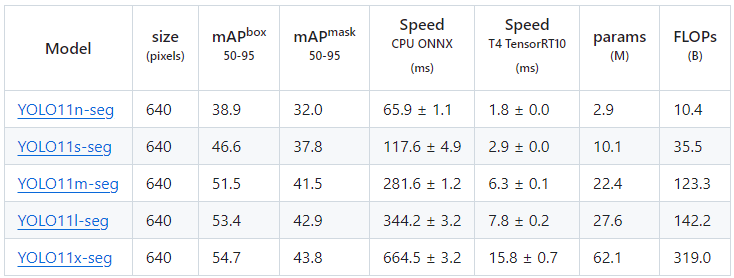

In [9]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolo11n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolo11n-seg.pt')

100%|██████████| 5.90M/5.90M [00:00<00:00, 21.7MB/s]


In [10]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [11]:
model.train(data='/content/nut_data/YOLODataset/nut_data.yaml', epochs=100, patience=10, batch=8, imgsz=640)

Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/nut_data/YOLODataset/nut_data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 4.33MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 19.1MB/s]


AMP: checks passed ✅


train: Scanning /content/nut_data/YOLODataset/labels/train... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:00<00:00, 1037.08it/s]

train: New cache created: /content/nut_data/YOLODataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/nut_data/YOLODataset/labels/val... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 832.32it/s]

val: New cache created: /content/nut_data/YOLODataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.66G      1.074      1.364      5.087     0.8571         34        640: 100%|██████████| 27/27 [00:22<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         54        173          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.59G      1.123      1.233      4.729     0.8339         34        640: 100%|██████████| 27/27 [00:14<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all         54        173     0.0165      0.339     0.0282     0.0107     0.0249      0.509     0.0552     0.0374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.58G      1.202      1.165      4.236     0.8303         38        640: 100%|██████████| 27/27 [00:15<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

                   all         54        173     0.0125      0.639     0.0532     0.0295     0.0139      0.725     0.0704      0.039



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.58G      1.177      1.107      3.857     0.8357         49        640: 100%|██████████| 27/27 [00:15<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all         54        173     0.0113      0.679     0.0762     0.0476     0.0126      0.765     0.0833     0.0467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.58G      1.153      1.158      3.643     0.8388         25        640: 100%|██████████| 27/27 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all         54        173      0.502      0.149       0.11     0.0715      0.503      0.153      0.112     0.0684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.59G       1.09       1.19      3.318     0.8327         51        640: 100%|██████████| 27/27 [00:17<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


                   all         54        173       0.34      0.192      0.111     0.0815       0.34      0.192      0.112     0.0664

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.58G      1.082      1.123       3.21     0.8523         41        640: 100%|██████████| 27/27 [00:18<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all         54        173      0.319        0.2      0.108     0.0801      0.319        0.2      0.108     0.0666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.59G      1.042      1.086      3.027     0.8462         34        640: 100%|██████████| 27/27 [00:18<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all         54        173      0.329       0.35      0.121     0.0924      0.328      0.348       0.12     0.0746



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.57G       1.01      1.083      2.807      0.839         46        640: 100%|██████████| 27/27 [00:18<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.98it/s]


                   all         54        173      0.345      0.366       0.14      0.107      0.344      0.368      0.137     0.0823

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.57G     0.9939      1.081      2.691     0.8316         48        640: 100%|██████████| 27/27 [00:19<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]


                   all         54        173      0.362      0.353       0.17       0.13      0.359      0.338      0.172     0.0952

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.56G     0.9735      1.032      2.646     0.8345         41        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]


                   all         54        173      0.398      0.336      0.195      0.152      0.398      0.346      0.197      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.58G       0.96     0.9991      2.488     0.8401         40        640: 100%|██████████| 27/27 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]


                   all         54        173      0.398      0.461       0.23      0.179      0.398      0.461      0.229      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.58G     0.9834      1.056      2.383     0.8371         44        640: 100%|██████████| 27/27 [00:19<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all         54        173      0.503      0.307      0.244      0.186      0.503      0.305       0.24      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.6G     0.9603      1.076      2.391     0.8351         43        640: 100%|██████████| 27/27 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all         54        173      0.317      0.395       0.26      0.201      0.319      0.391      0.259      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.58G     0.9248     0.9713      2.328     0.8256         50        640: 100%|██████████| 27/27 [00:18<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.56it/s]

                   all         54        173      0.427      0.312      0.269      0.209      0.424      0.305      0.264      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.57G     0.9125      1.011      2.152     0.8334         44        640: 100%|██████████| 27/27 [00:19<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]


                   all         54        173       0.41      0.301      0.273      0.214      0.408      0.299      0.269      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.61G     0.9145     0.9322      2.177     0.8282         34        640: 100%|██████████| 27/27 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all         54        173      0.473      0.273      0.306      0.236       0.47      0.272      0.304      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.56G     0.9107     0.9319      2.152     0.8374         43        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all         54        173      0.562      0.281      0.299      0.242      0.562      0.281      0.297       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.59G     0.8559     0.9539      1.979     0.8273         29        640: 100%|██████████| 27/27 [00:17<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all         54        173      0.497      0.346       0.33      0.261      0.504      0.306      0.328      0.206



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.57G     0.8813     0.9579      2.009     0.8271         31        640: 100%|██████████| 27/27 [00:17<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all         54        173      0.443      0.297      0.318      0.256      0.443      0.297      0.317      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.59G     0.8834     0.9267      1.976     0.8276         52        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all         54        173      0.471      0.365      0.349      0.278      0.471      0.365      0.348       0.22



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.58G     0.8497     0.9606      1.874     0.8253         44        640: 100%|██████████| 27/27 [00:17<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all         54        173      0.574      0.292      0.342      0.274      0.574      0.292       0.34      0.222



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.56G     0.8583     0.9299      1.864     0.8218         42        640: 100%|██████████| 27/27 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]

                   all         54        173       0.48      0.392      0.359      0.282      0.478      0.389      0.356      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.57G     0.8466     0.9179       1.76     0.8234         28        640: 100%|██████████| 27/27 [00:16<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all         54        173       0.36      0.473       0.35       0.28      0.358      0.447      0.347      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100       1.6G     0.8317      0.905      1.695     0.8286         50        640: 100%|██████████| 27/27 [00:15<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all         54        173      0.518      0.349      0.382      0.306      0.516      0.346      0.381      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.58G     0.8328     0.8996      1.705     0.8273         48        640: 100%|██████████| 27/27 [00:14<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


                   all         54        173      0.362      0.455      0.409      0.327      0.359       0.45      0.405      0.274

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.58G     0.8333     0.9725       1.66     0.8224         64        640: 100%|██████████| 27/27 [00:15<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         54        173      0.664      0.307      0.367      0.291      0.661      0.302      0.362      0.234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.58G     0.8256     0.9139      1.634     0.8167         44        640: 100%|██████████| 27/27 [00:15<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all         54        173      0.594      0.367      0.386      0.313      0.591      0.364      0.383      0.248



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.6G     0.8126     0.9069       1.62     0.8169         47        640: 100%|██████████| 27/27 [00:15<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         54        173      0.386      0.585      0.394      0.315      0.386      0.585      0.394      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.56G     0.8204     0.9005      1.537     0.8202         38        640: 100%|██████████| 27/27 [00:16<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all         54        173      0.534      0.391      0.419       0.34      0.531      0.389      0.414       0.28



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.57G      0.828     0.8928      1.602     0.8257         36        640: 100%|██████████| 27/27 [00:17<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]


                   all         54        173      0.547      0.436      0.429      0.349      0.543      0.431      0.422       0.28

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.58G     0.8148      0.852      1.472     0.8197         52        640: 100%|██████████| 27/27 [00:18<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.36it/s]


                   all         54        173      0.445      0.431      0.394      0.318      0.443      0.423      0.392      0.261

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.58G     0.8275     0.9119      1.591     0.8253         54        640: 100%|██████████| 27/27 [00:19<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


                   all         54        173      0.396      0.486      0.413      0.331      0.396      0.482      0.414      0.268

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100       1.6G     0.8103     0.8909      1.599     0.8227         44        640: 100%|██████████| 27/27 [00:18<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all         54        173      0.443      0.452      0.407      0.328      0.436      0.448      0.403      0.267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.6G     0.7797      0.833      1.489     0.8171         40        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.07it/s]


                   all         54        173      0.456      0.385      0.391      0.314      0.451       0.38      0.383      0.243

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.57G     0.7973     0.8606      1.359     0.8149         32        640: 100%|██████████| 27/27 [00:18<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all         54        173      0.508       0.44      0.416      0.331      0.504      0.435       0.41      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.56G     0.7984     0.8559      1.315     0.8194         77        640: 100%|██████████| 27/27 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all         54        173      0.668      0.355      0.438      0.349      0.668      0.355      0.437      0.278



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100       1.6G     0.7804     0.8775      1.332      0.814         57        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all         54        173      0.527      0.414      0.443      0.355      0.519      0.405      0.439      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.58G     0.7478     0.8432      1.268     0.8154         45        640: 100%|██████████| 27/27 [00:17<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]


                   all         54        173      0.327       0.41      0.438      0.355      0.673      0.305      0.436      0.277

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100       1.6G     0.7768     0.8238      1.311     0.8152         49        640: 100%|██████████| 27/27 [00:16<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all         54        173      0.713      0.366      0.471      0.389       0.71      0.364      0.467      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.58G     0.7306     0.7918      1.254     0.8152         45        640: 100%|██████████| 27/27 [00:15<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all         54        173      0.624      0.506      0.527      0.434       0.62        0.5      0.522      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.61G     0.7894     0.8135      1.262     0.8234         45        640: 100%|██████████| 27/27 [00:14<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all         54        173       0.66      0.464      0.534       0.44      0.658      0.462       0.53      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.58G     0.7761     0.8163      1.227     0.8101         54        640: 100%|██████████| 27/27 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all         54        173       0.49      0.485      0.515      0.431      0.486       0.48      0.507      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.58G     0.7795     0.8317      1.294     0.8067         56        640: 100%|██████████| 27/27 [00:15<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all         54        173      0.326      0.585      0.487      0.406      0.324      0.583       0.48      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.58G     0.7207     0.8016      1.192     0.8064         48        640: 100%|██████████| 27/27 [00:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all         54        173      0.618      0.419      0.514      0.427      0.616      0.416      0.509      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.57G     0.7391     0.7987      1.231     0.8136         23        640: 100%|██████████| 27/27 [00:17<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


                   all         54        173      0.798      0.365      0.532      0.434      0.795      0.364      0.528      0.332

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.58G     0.7495     0.8164       1.19     0.8087         35        640: 100%|██████████| 27/27 [00:17<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.79it/s]

                   all         54        173      0.357      0.614      0.538      0.448      0.355      0.613       0.54       0.34



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.56G     0.8025     0.8725      1.187     0.8185         39        640: 100%|██████████| 27/27 [00:19<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


                   all         54        173      0.415      0.647       0.55      0.458      0.415      0.646      0.554      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.59G     0.7255     0.7581      1.173     0.8125         37        640: 100%|██████████| 27/27 [00:18<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]


                   all         54        173      0.577      0.555      0.589      0.481      0.575      0.553      0.587      0.386

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.58G     0.7409     0.8172      1.152     0.8074         39        640: 100%|██████████| 27/27 [00:18<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]


                   all         54        173      0.633      0.518      0.571      0.468      0.631      0.516      0.568       0.37

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.62G     0.7472     0.7993      1.153     0.8091         42        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all         54        173      0.415      0.638      0.532      0.444      0.413      0.636      0.529       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.56G     0.7224     0.7574      1.103     0.8111         41        640: 100%|██████████| 27/27 [00:18<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]

                   all         54        173      0.386      0.631      0.529      0.438      0.384      0.628      0.526      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       1.6G     0.7245     0.8011      1.109     0.8036         44        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all         54        173      0.434      0.526      0.563      0.465      0.432      0.523      0.559      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.58G     0.7164     0.7796      1.092     0.8133         40        640: 100%|██████████| 27/27 [00:18<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all         54        173      0.401       0.54      0.513      0.431        0.4      0.537      0.509      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.57G     0.6976     0.7984      1.037     0.8051         19        640: 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


                   all         54        173      0.707      0.383      0.453       0.37      0.702      0.379      0.446      0.295

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.58G     0.7409     0.8159      1.002     0.8106         46        640: 100%|██████████| 27/27 [00:17<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         54        173      0.536      0.508      0.467      0.382       0.53      0.506      0.458      0.287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.58G     0.6754     0.7164      1.025      0.808         25        640: 100%|██████████| 27/27 [00:18<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


                   all         54        173      0.354      0.555      0.507       0.42      0.353      0.553      0.504       0.34

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.61G     0.7238     0.7911      1.008      0.809         37        640: 100%|██████████| 27/27 [00:17<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all         54        173      0.371       0.58      0.497      0.412      0.367      0.574      0.493      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.58G      0.707     0.7601      1.006      0.796         36        640: 100%|██████████| 27/27 [00:15<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all         54        173      0.401      0.534      0.509      0.426      0.396      0.528      0.504      0.339


EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 49, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

59 epochs completed in 0.363 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.4 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,837,493 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]


                   all         54        173      0.578      0.555       0.59      0.484      0.576      0.552      0.588      0.386
                Acorns          8         30      0.853        0.6      0.697      0.527      0.853        0.6      0.697      0.433
              Chestnut          3          4      0.451       0.75      0.687      0.596      0.451       0.75      0.687       0.51
                Peanut          1          1          0          0      0.199      0.139          0          0      0.199       0.16
        Sunflower seed          1          2      0.439        0.5      0.414      0.373      0.439        0.5      0.414      0.215
          Pumpkin seed          3         10       0.28          1      0.756       0.57       0.28          1      0.756      0.476
                Almond         15         40      0.887       0.55      0.818      0.633      0.887       0.55      0.818      0.486
                Walnut          3          6      0.127      0.167   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a75e0f60be0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.03

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

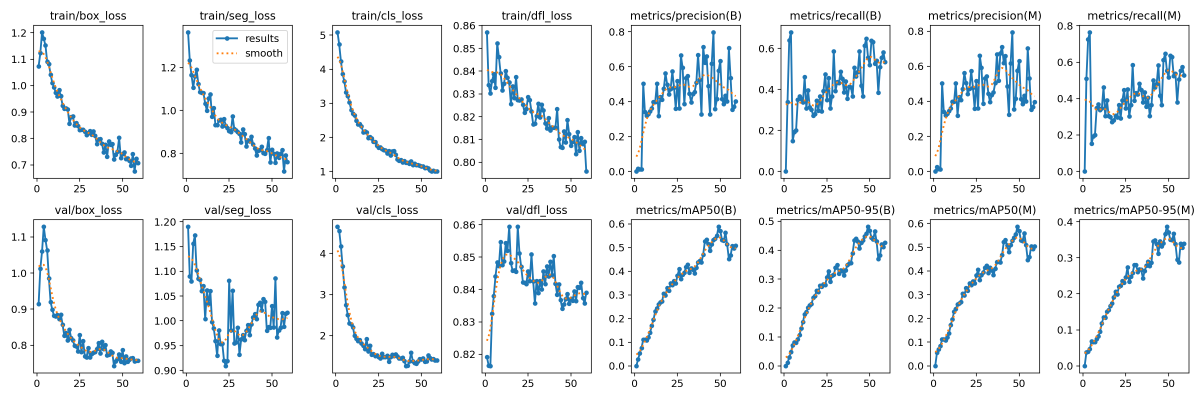

In [12]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/segment/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [13]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 15
{0: 'Acorns', 1: 'Chestnut', 2: 'Peanut', 3: 'Sunflower seed', 4: 'Pumpkin seed', 5: 'Almond', 6: 'Walnut', 7: 'Macadamia', 8: 'Cashew nut', 9: 'Pine nut', 10: 'Pistachio', 11: 'Ginkgo nut', 12: 'Brazilian nut', 13: 'Chestnut bur', 14: 'Pecan'}


# **6. Custom 모델로 Segmentation(분할)**

**Image Segmentation**

In [14]:
# 모델 예측
results = model.predict(source='/content/nut_data/YOLODataset/images/val/825627_594.jpg', save=True)


image 1/1 /content/nut_data/YOLODataset/images/val/825627_594.jpg: 480x640 2 Cashew nuts, 164.5ms
Speed: 4.7ms preprocess, 164.5ms inference, 5.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/train2


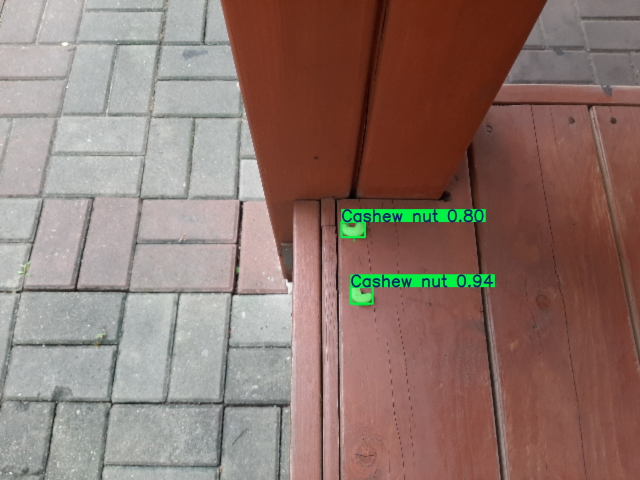

In [15]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/train2/825627_594.jpg')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)